### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
from scipy import signal
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

### Functions

In [2]:
def getData(cfileName):
    """
    Given a name of a *.cfile, this function extracts the interleaved
    Inphase-Quadrature data samples and convert it into a numpy array of complex
    data elements. *.cfile format has interleaved I and Q samples where each sample
    is a float32 type. GNURadio Companion (GRC) scripts output data into a file
    though a file sink block in this format.
    Read more in SDR data types: https://github.com/miek/inspectrum
    """
    # Read the *.cfile which has each element in float32 format.
    data = np.fromfile(cfileName, dtype="float32")
    # Take each consecutive interleaved I sample and Q sample to create a single complex element.
    data = data[0::2] + 1j*data[1::2]
    #print("data type=", type(data))
    # Return the complex numpy array.
    return data

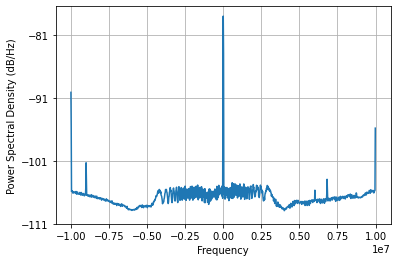

In [3]:
data = getData("/home/asanka/Desktop/smartphone-EM-dataset-2020-11-23/nokia-4-2/calandar-app.cfile")
fig = plt.figure()
plt.psd(data, NFFT=1024, Fs=20e6)
plt.show()
del data

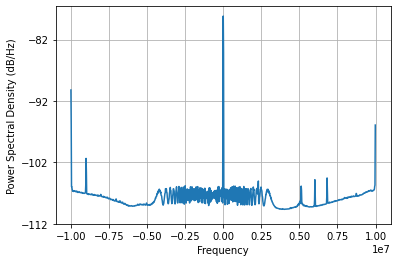

In [4]:
data = getData("/home/asanka/Desktop/smartphone-EM-dataset-2020-11-23/nokia-4-2/camera-photo.cfile")
fig = plt.figure()
plt.psd(data, NFFT=1024, Fs=20e6)
plt.show()
del data

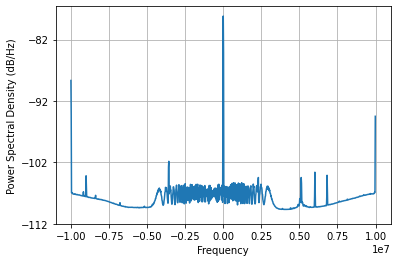

In [5]:
data = getData("/home/asanka/Desktop/smartphone-EM-dataset-2020-11-23/nokia-4-2/camera-video.cfile")
fig = plt.figure()
plt.psd(data, NFFT=1024, Fs=20e6)
plt.show()
del data

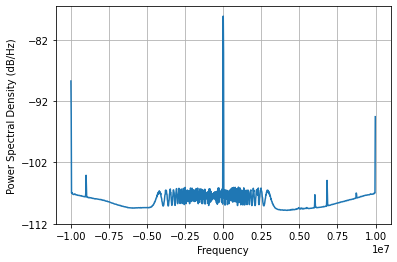

In [6]:
data = getData("/home/asanka/Desktop/smartphone-EM-dataset-2020-11-23/nokia-4-2/email-app.cfile")
fig = plt.figure()
plt.psd(data, NFFT=1024, Fs=20e6)
plt.show()
del data

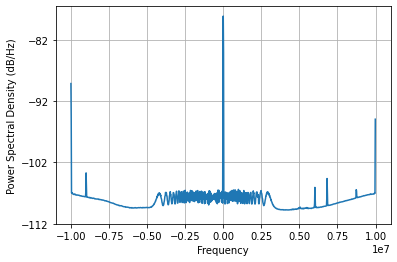

In [7]:
data = getData("/home/asanka/Desktop/smartphone-EM-dataset-2020-11-23/nokia-4-2/gallary-app.cfile")
fig = plt.figure()
plt.psd(data, NFFT=1024, Fs=20e6)
plt.show()
del data

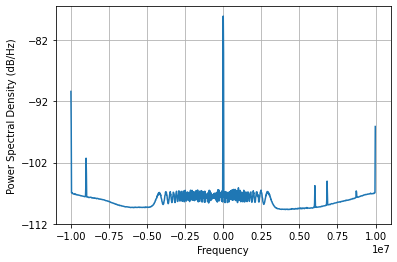

In [8]:
data = getData("/home/asanka/Desktop/smartphone-EM-dataset-2020-11-23/nokia-4-2/home-screen.cfile")
fig = plt.figure()
plt.psd(data, NFFT=1024, Fs=20e6)
plt.show()
del data

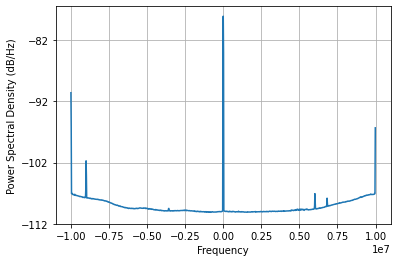

In [9]:
data = getData("/home/asanka/Desktop/smartphone-EM-dataset-2020-11-23/nokia-4-2/idle.cfile")
fig = plt.figure()
plt.psd(data, NFFT=1024, Fs=20e6)
plt.show()
del data

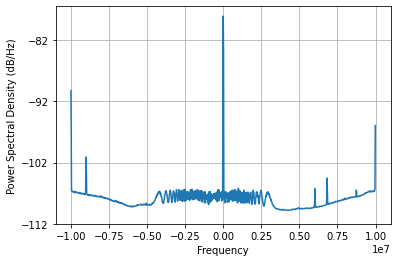

In [10]:
data = getData("/home/asanka/Desktop/smartphone-EM-dataset-2020-11-23/nokia-4-2/phone-app.cfile")
fig = plt.figure()
plt.psd(data, NFFT=1024, Fs=20e6)
plt.show()
del data

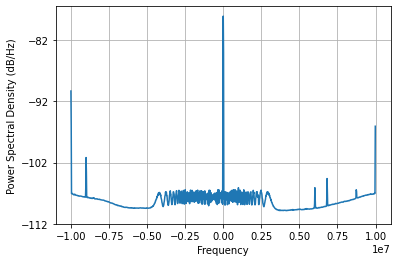

In [11]:
data = getData("/home/asanka/Desktop/smartphone-EM-dataset-2020-11-23/nokia-4-2/sms-app.cfile")
fig = plt.figure()
plt.psd(data, NFFT=1024, Fs=20e6)
plt.show()
del data

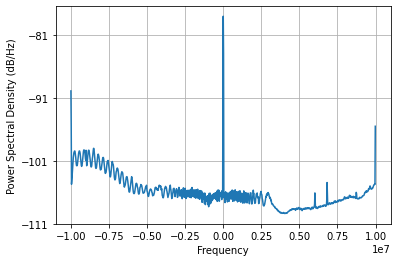

In [12]:
data = getData("/home/asanka/Desktop/smartphone-EM-dataset-2020-11-23/nokia-4-2/web-browser-app.cfile")
fig = plt.figure()
plt.psd(data, NFFT=1024, Fs=20e6)
plt.show()
del data

### Loading an EM Trace and Plotting

#### Settings:

In [3]:
# number of samples per class
num_samp_per_class = 20000

# FFT size for the STFT operation (which is same as the feature vector size)
fft_size = feature_vector_size = 2048 #1024

# number of overlapping samples for the STFT operation
fft_overlap = 256

In [4]:
#labels = ["audio-recording", "camera-photo", "camera-video", "email-app", "gallary-app"
#          , "home-screen", "idle", "phone-app", "sms-app", "web-browser-app"]

#labels = ["camera-video", "home-screen", "idle", "web-browser-app"]

labels = ["camera-video", "calandar-app", "idle", "web-browser-app"]

#### Preparing the Data of Class 0

In [5]:
class_label = 0
data = getData("/home/asanka/Desktop/smartphone-EM-dataset-2020-11-23/nokia-4-2/camera-video.cfile")
f, t, Zxx = signal.stft(data, fs=20e6, nperseg=fft_size, noverlap=fft_overlap)
print(len(f))
print(len(t))
print(Zxx.shape)
del data
Zxx = Zxx.transpose()
X = Zxx[:num_samp_per_class]
y = np.full(num_samp_per_class, class_label)
del Zxx
print(X.shape)
print(y.shape)

/home/asanka/miniconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


2048
45790
(2048, 45790)
(20000, 2048)
(20000,)


#### Preparing the Data of Class 1

In [6]:
class_label = 1
data = getData("/home/asanka/Desktop/smartphone-EM-dataset-2020-11-23/nokia-4-2/calandar-app.cfile")
f, t, Zxx = signal.stft(data, fs=20e6, nperseg=fft_size, noverlap=fft_overlap)
print(len(f))
print(len(t))
print(Zxx.shape)
del data
Zxx = Zxx.transpose()

X = np.concatenate((X, Zxx[:num_samp_per_class]), axis=0) 
y = np.concatenate((y, np.full(num_samp_per_class, class_label)), axis=0)
#X = Zxx[:num_samp_per_class]
#y = np.full(num_samp_per_class, class_label)
del Zxx
print(X.shape)
print(y.shape)

2048
42741
(2048, 42741)
(40000, 2048)
(40000,)


#### Preparing the Data of Class 2

In [7]:
class_label = 2
data = getData("/home/asanka/Desktop/smartphone-EM-dataset-2020-11-23/nokia-4-2/idle.cfile")
f, t, Zxx = signal.stft(data, fs=20e6, nperseg=fft_size, noverlap=fft_overlap)
print(len(f))
print(len(t))
print(Zxx.shape)
del data
Zxx = Zxx.transpose()
X = np.concatenate((X, Zxx[:num_samp_per_class]), axis=0) 
y = np.concatenate((y, np.full(num_samp_per_class, class_label)), axis=0)
#X = Zxx[:num_samp_per_class]
#y = np.full(num_samp_per_class, class_label)
del Zxx
print(X.shape)
print(y.shape)

2048
29630
(2048, 29630)
(60000, 2048)
(60000,)


#### Preparing the Data of Class 3

In [8]:
class_label = 3
data = getData("/home/asanka/Desktop/smartphone-EM-dataset-2020-11-23/nokia-4-2/web-browser-app.cfile")
f, t, Zxx = signal.stft(data, fs=20e6, nperseg=fft_size, noverlap=fft_overlap)
print(len(f))
print(len(t))
print(Zxx.shape)
del data
Zxx = Zxx.transpose()
X = np.concatenate((X, Zxx[:num_samp_per_class]), axis=0) 
y = np.concatenate((y, np.full(num_samp_per_class, class_label)), axis=0)
#X = Zxx[:num_samp_per_class]
#y = np.full(num_samp_per_class, class_label)
del Zxx
print(X.shape)
print(y.shape)

2048
29351
(2048, 29351)
(80000, 2048)
(80000,)


#### Preparing the Data of Class 4

In [ ]:
class_label = 4
data = getData("/home/asanka/Desktop/smartphone-EM-dataset-2020-11-23/galaxy-grand-prime/gallary-app.cfile")
f, t, Zxx = signal.stft(data, fs=20e6, nperseg=fft_size, noverlap=fft_overlap)
print(len(f))
print(len(t))
print(Zxx.shape)
del data
Zxx = Zxx.transpose()
X = np.concatenate((X, Zxx[:num_samp_per_class]), axis=0) 
y = np.concatenate((y, np.full(num_samp_per_class, class_label)), axis=0)
#X = Zxx[:num_samp_per_class]
#y = np.full(num_samp_per_class, class_label)
del Zxx
print(X.shape)
print(y.shape)

#### Preparing the Data of Class 5

In [ ]:
class_label = 5
data = getData("/home/asanka/Desktop/smartphone-EM-dataset-2020-11-23/galaxy-grand-prime/home-screen.cfile")
f, t, Zxx = signal.stft(data, fs=20e6, nperseg=fft_size, noverlap=fft_overlap)
print(len(f))
print(len(t))
print(Zxx.shape)
del data
Zxx = Zxx.transpose()
X = np.concatenate((X, Zxx[:num_samp_per_class]), axis=0) 
y = np.concatenate((y, np.full(num_samp_per_class, class_label)), axis=0)
#X = Zxx[:num_samp_per_class]
#y = np.full(num_samp_per_class, class_label)
del Zxx
print(X.shape)
print(y.shape)

#### Preparing the Data of Class 6

In [ ]:
class_label = 6
data = getData("/home/asanka/Desktop/smartphone-EM-dataset-2020-11-23/galaxy-grand-prime/idle.cfile")
f, t, Zxx = signal.stft(data, fs=20e6, nperseg=fft_size, noverlap=fft_overlap)
print(len(f))
print(len(t))
print(Zxx.shape)
del data
Zxx = Zxx.transpose()
X = np.concatenate((X, Zxx[:num_samp_per_class]), axis=0) 
y = np.concatenate((y, np.full(num_samp_per_class, class_label)), axis=0)
#X = Zxx[:num_samp_per_class]
#y = np.full(num_samp_per_class, class_label)
del Zxx
print(X.shape)
print(y.shape)

#### Preparing the Data of Class 7

In [ ]:
class_label = 7
data = getData("/home/asanka/Desktop/smartphone-EM-dataset-2020-11-23/galaxy-grand-prime/phone-app.cfile")
f, t, Zxx = signal.stft(data, fs=20e6, nperseg=fft_size, noverlap=fft_overlap)
print(len(f))
print(len(t))
print(Zxx.shape)
del data
Zxx = Zxx.transpose()
X = np.concatenate((X, Zxx[:num_samp_per_class]), axis=0) 
y = np.concatenate((y, np.full(num_samp_per_class, class_label)), axis=0)
#X = Zxx[:num_samp_per_class]
#y = np.full(num_samp_per_class, class_label)
del Zxx
print(X.shape)
print(y.shape)

#### Preparing the Data of Class 8

In [ ]:
class_label = 8
data = getData("/home/asanka/Desktop/smartphone-EM-dataset-2020-11-23/galaxy-grand-prime/sms-app.cfile")
f, t, Zxx = signal.stft(data, fs=20e6, nperseg=fft_size, noverlap=fft_overlap)
print(len(f))
print(len(t))
print(Zxx.shape)
del data
Zxx = Zxx.transpose()
X = np.concatenate((X, Zxx[:num_samp_per_class]), axis=0) 
y = np.concatenate((y, np.full(num_samp_per_class, class_label)), axis=0)
#X = Zxx[:num_samp_per_class]
#y = np.full(num_samp_per_class, class_label)
del Zxx
print(X.shape)
print(y.shape)

#### Preparing the Data of Class 9

In [ ]:
class_label = 9
data = getData("/home/asanka/Desktop/smartphone-EM-dataset-2020-11-23/galaxy-grand-prime/web-browser-app.cfile")
f, t, Zxx = signal.stft(data, fs=20e6, nperseg=fft_size, noverlap=fft_overlap)
print(len(f))
print(len(t))
print(Zxx.shape)
del data
Zxx = Zxx.transpose()
X = np.concatenate((X, Zxx[:num_samp_per_class]), axis=0) 
y = np.concatenate((y, np.full(num_samp_per_class, class_label)), axis=0)
#X = Zxx[:num_samp_per_class]
#y = np.full(num_samp_per_class, class_label)
del Zxx
print(X.shape)
print(y.shape)

### Building the Model

In [9]:
X = abs(X)

# scaling the features (only real part of the data can be used)
scaler = MinMaxScaler()
scaler.fit(X)
print(scaler.data_max_)
X = scaler.transform(X)

[0.04206065 0.03111969 0.02332321 ... 0.02584011 0.03069128 0.03682231]


In [10]:
# Split data to train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

In [11]:
model = keras.models.Sequential()
model.add(keras.layers.Input(shape=(feature_vector_size,)))
#model.add(keras.layers.Input(shape=(100,)))

model.add(keras.layers.Dense(1400, activation="relu"))

model.add(keras.layers.Dense(800, activation="relu"))
model.add(keras.layers.Dense(500, activation="relu"))
model.add(keras.layers.Dense(200, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))

model.add(keras.layers.Dense(50, activation="relu"))
#model.add(keras.layers.Dense(10, activation="softmax"))
model.add(keras.layers.Dense(4, activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1400)              2868600   
_________________________________________________________________
dense_1 (Dense)              (None, 800)               1120800   
_________________________________________________________________
dense_2 (Dense)              (None, 500)               400500    
_________________________________________________________________
dense_3 (Dense)              (None, 200)               100200    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_5 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_6 (Dense)              (None, 4)                 2

In [12]:
opt = keras.optimizers.SGD(learning_rate=0.005)
model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])
#model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [13]:
#history = model.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test))
#history = model.fit(X_train, y_train, epochs=30, validation_split=0.1)

checkpoint_cb = keras.callbacks.ModelCheckpoint("./4.Nokia-4.2-Analysis-4-Classes.h5", save_best_only=True)
history = model.fit(X_train, y_train, epochs=30, validation_split=0.1, callbacks=[checkpoint_cb])

Epoch 1/30
2025/2025 [==============================] - 41s 20ms/step - loss: 1.3623 - accuracy: 0.4612 - val_loss: 1.2952 - val_accuracy: 0.5275
Epoch 2/30
2025/2025 [==============================] - 41s 20ms/step - loss: 0.9781 - accuracy: 0.6291 - val_loss: 0.7797 - val_accuracy: 0.7249
Epoch 3/30
2025/2025 [==============================] - 41s 20ms/step - loss: 0.6813 - accuracy: 0.7198 - val_loss: 0.6647 - val_accuracy: 0.6857
Epoch 4/30
2025/2025 [==============================] - 42s 21ms/step - loss: 0.5302 - accuracy: 0.7604 - val_loss: 0.4745 - val_accuracy: 0.7829
Epoch 5/30
2025/2025 [==============================] - 42s 21ms/step - loss: 0.4749 - accuracy: 0.7842 - val_loss: 0.4542 - val_accuracy: 0.7908
Epoch 6/30
2025/2025 [==============================] - 42s 21ms/step - loss: 0.4623 - accuracy: 0.7923 - val_loss: 0.4617 - val_accuracy: 0.7986
Epoch 7/30
2025/2025 [==============================] - 42s 21ms/step - loss: 0.4582 - accuracy: 0.7968 - val_loss: 0.4875 -

### Plotting

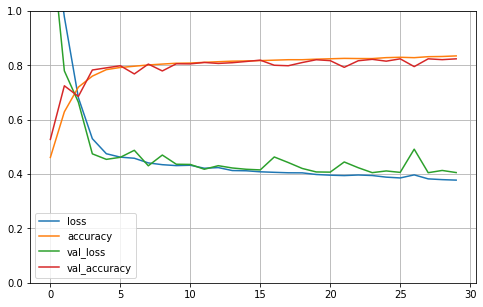

In [14]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

### Testing the Model

In [15]:
#model = keras.models.load_model("./3.Galaxy-Grand-Prime-Analysis.h5")
model = keras.models.load_model("./4.Nokia-4.2-Analysis-4-Classes.h5")

In [16]:
results = model.evaluate(X_test, y_test)
print("test loss, test acc:", results)

250/250 [==============================] - 2s 9ms/step - loss: 0.4130 - accuracy: 0.2411
test loss, test acc: [0.4130094349384308, 0.24112500250339508]


In [17]:
#y_pred = model.predict(X_test)
y_pred = model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [18]:
print(y_pred)

[0 0 1 ... 3 2 2]


In [19]:
print(y_pred[0])

0


In [20]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1906    6   11    3]
 [  12 1521   80  342]
 [   1    0 2081   14]
 [  10  587  348 1078]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1926
           1       0.72      0.78      0.75      1955
           2       0.83      0.99      0.90      2096
           3       0.75      0.53      0.62      2023

    accuracy                           0.82      8000
   macro avg       0.82      0.82      0.82      8000
weighted avg       0.82      0.82      0.81      8000



### Saving the Model

In [ ]:
#model.save("./4.Nokia-4.2-Analysis-4-Classes.h5")